# AI based Food Intake Recommentations

## Mask R CNN model for detecting the item name with segmentation and  its corresponding average calories

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/food/"))  # To find local version
import food
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_food_0001.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
COCO_MODEL_PATH=r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\logs\food20210830T2108\mask_rcnn_food_0030.h5'
class InferenceConfig(food.FoodConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)
class_names = ['cake', 'burger', 'french_fries', 'chicken',
               'toast', 'egg', 'pizza', 'cookie', 'hot dog', 'steak']

Using TensorFlow backend.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                22
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## test Image 

In [2]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\fried_chicken\chicken_13.jpg')

In [12]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\fried_chicken\chicken_2.jpg')

In [13]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\cookies\cookies_2.jpg')

In [14]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\fries_2.jpg')

In [15]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Dataset\train\combinations\combine_10.jpg')

In [16]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\new_chicken_14.jpg')

In [2]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\steak_3.jpg')

In [18]:
image = skimage.io.imread(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\food\dataset\train\egg_3.jpg')

Processing 1 images
image                    shape: (688, 688, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 22)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Total Objects found 5
chicken
chicken
chicken
chicken
chicken
total calories in this food item = 1470


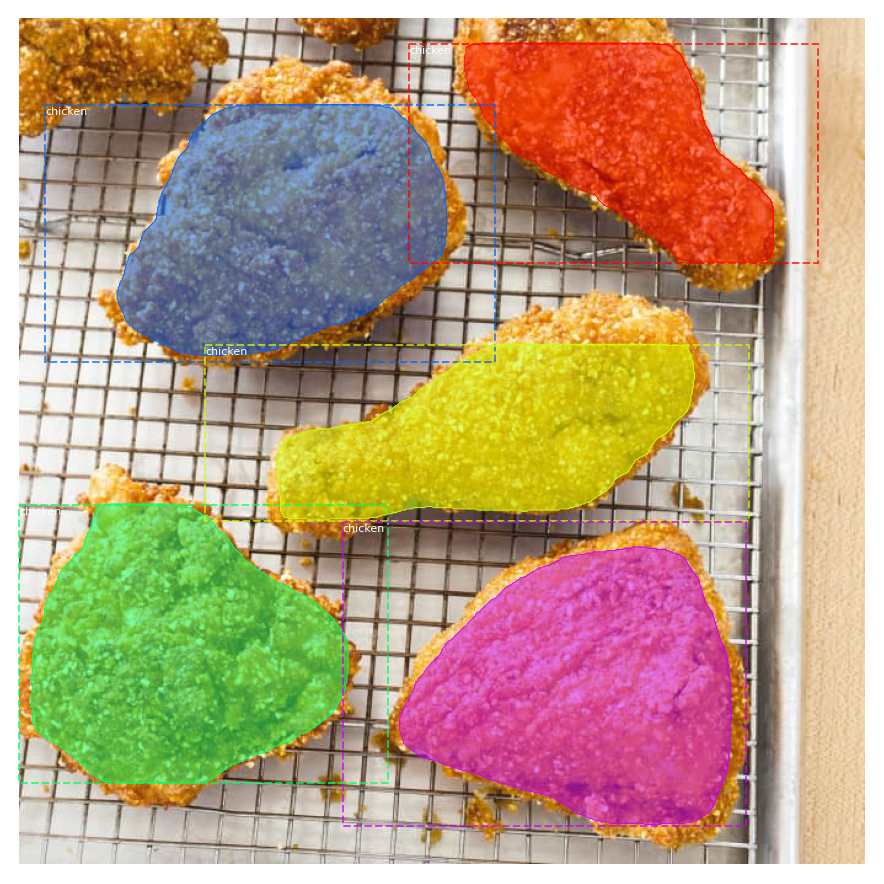

In [3]:
results = model.detect([image], verbose=1)
global final_set
# Visualize results
r = results[0]
classes= r['class_ids']
print("Total Objects found", len(classes))
p = []
for i in range(len(classes)):
    p.append(class_names[classes[i]])
    #print(class_names[classes[i]])
new_p = list(set(p))


file=open(r'C:\Users\Administrator\test\Tech_project\Calorie-Predictor\Mask_RCNN\samples\categories.txt','w') 
file.write(str(new_p)); 
file.close() 
#for n in new_p:
    #print(n)    
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'])

### The above images are now segmented with class and calories

## Food Intake Recommendation 

### sample output 1 

In [4]:
visualize.Food_intake_recommendation(14371,9.03,0,2.8,0.87,5.36,0,41,21,262,732,1949,3600,1651)

Test Data : {'TotalSteps': 14371, 'TotalDistance': 9.03, 'LoggedActivitiesDistance': 0, 'VeryActiveDistance': 2.8, 'ModeratelyActiveDistance': 0.87, 'LightActiveDistance': 5.36, 'SedentaryActiveDistance': 0, 'VeryActiveMinutes': 41, 'FairlyActiveMinutes': 21, 'LightlyActiveMinutes': 262, 'SedentaryMinutes': 732, 'Calories': 1949, 'Calorie_consumption_day': 3600, 'Net_consumed_Cal_day': 1651}
621
Recommendation: You have to burn upto 521 Calories.


### sample output 2

In [5]:
visualize.Food_intake_recommendation(22026,17.64,0,13.39,0.58,3.66,0,125,14,228,1073,3589,4500,911)

Test Data : {'TotalSteps': 22026, 'TotalDistance': 17.64, 'LoggedActivitiesDistance': 0, 'VeryActiveDistance': 13.39, 'ModeratelyActiveDistance': 0.58, 'LightActiveDistance': 3.66, 'SedentaryActiveDistance': 0, 'VeryActiveMinutes': 125, 'FairlyActiveMinutes': 14, 'LightlyActiveMinutes': 228, 'SedentaryMinutes': 1073, 'Calories': 3589, 'Calorie_consumption_day': 4500, 'Net_consumed_Cal_day': 911}
-119
Recommendation: No correction needed.


### sample output 3

In [6]:
visualize.Food_intake_recommendation(6497,4.21,0,0,0,4.19,0.02,0,0,202,1238,1492,3600,2108)

Test Data : {'TotalSteps': 6497, 'TotalDistance': 4.21, 'LoggedActivitiesDistance': 0, 'VeryActiveDistance': 0, 'ModeratelyActiveDistance': 0, 'LightActiveDistance': 4.19, 'SedentaryActiveDistance': 0.02, 'VeryActiveMinutes': 0, 'FairlyActiveMinutes': 0, 'LightlyActiveMinutes': 202, 'SedentaryMinutes': 1238, 'Calories': 1492, 'Calorie_consumption_day': 3600, 'Net_consumed_Cal_day': 2108}
1078
Recommendation: You have to burn upto 978 Calories.
